NIA Python Bootcamp UNIT 3 - Wednesday July 19, 2017

# UNIT 1 review

1. Python ecosystem of tools
2. Jupyter Notebook is code, output and documentation all in one document
3. Type code into cells, and to run them you press Shift-Enter
4. Different data types for different data
4. Tab completion reduces typing, shows you pop-up menu of all the things you can do with that piece of data
5. Operators take one or more input values and turn them into other values *based on the input values type*
6. Converting data from one type to another using the function syntax, e.g., <code>int()</code>

# UNIT 2 Review

1. Exploring data types using the <code>TAB</code> key
2. Python syntax for taking slices of iterables
1. NumPy arrays: basic math operations in 1-D and 2-D (e.g., row-wise and column-wise eman)
1. Subselecting based on a boolean criterion
1. Example: Images as 3-D matrices

# UNIT 3: 
3. PANDAS DataFrames
1. Simple and complex sorting

## PANDAS DataFrame

* pandas = [Python Data Analysis Library](http://pandas.pydata.org/)
* Emulate R's <code>data.frame</code> structure.
* Basically a NumPy matrix with
    * Row and column names
    * Can have columns of different types
    * Handles missing data better

## Load the PANDAS package into memory using <code>import()</code>

In [1]:
import pandas as pd

## Use PANDAS <code>read_*</code> functions to import data

* There are many functions to import data
* Type <code>pd.read_</code> then <code>TAB</code> to see all the import functions

In [ ]:
pd.read_

## Read data from file or URL

In [2]:
titanic_data_url  = "http://biostat.mc.vanderbilt.edu/wiki/pub/Main/DataSets/titanic3.xls"

In [3]:
titanic = pd.read_excel( titanic_data_url )

## Return type is a DataFrame

In [ ]:
type(titanic)

## What did we just load?

In [ ]:
titanic.shape

### Change the number of rows Pandas will display using the <code>set_option()</code> function

Use the word <code>None</code> if you want to display all of them.

In [ ]:
pd.set_option( 'display.max_rows', 50 )

### See the first N rows using <code>.head(N)</code>

Defaults to first 5

In [ ]:
titanic.head(2)

### See the last N rows using <code>.tail(N)</code>

Defaults to last 5.

In [ ]:
titanic.tail(1)

### See random N rows using <code>.sample(N)</code>

In [ ]:
titanic.sample(3)

## <code>len()</code> return number of observations (rows)

In [ ]:
len(titanic)

## <code>.shape</code> attribute gives the shape

In [ ]:
titanic.shape

## <code>.describe()</code>: Get basic statistics across all columns

* Detects which columns are quantitative gives descriptive stats for those

In [7]:
titanic.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


## <code>.count()</code> give number of non-empty cells

In [8]:
titanic.count()

pclass       1309
survived     1309
name         1309
sex          1309
age          1046
sibsp        1309
parch        1309
ticket       1309
fare         1308
cabin         295
embarked     1307
boat          486
body          121
home.dest     745
dtype: int64

## DataFrame row and column headers

* Like a NumPy array, but with column and row headers.
* Enables slicing by headers, and not just indices like with NumPy arrays
* The collection of row headers is stored in the <code>.index</code> attribute.
* The collection of column headers is stored in the <code>.columns</code> attribute.

In [ ]:
titanic.columns

In [ ]:
titanic.index

## Get a single column

Two ways to do it:

1. Use the "object-oriented" style of [API](https://en.wikipedia.org/wiki/Application_programming_interface), i.e., the "dot."
1. Use the <code>dict</code> style, i.e., key-value style (put the column name into brackets, get the column)
2. The returned data type is a PANDAS Series object, which keeps the index from the DataFrame attached

In [ ]:
titanic.columns

In [ ]:
titanic['home.dest']

## using .values

In [ ]:
titanic['home.dest'].values

## <code>.value_counts()</code>

In [ ]:
titanic['sex']

In [9]:
titanic.sex.value_counts()

male      843
female    466
Name: sex, dtype: int64

## Use <code>.pivot_table()</code> to have a breakdown of the data

### For categorical data, use <code>aggfunc='count'</code>

In [ ]:
titanic.pivot_table?

In [ ]:
titanic.count()

In [ ]:
titanic.pivot_table( values='survived', index='pclass',
                    columns='sex', aggfunc='count',
                    margins=True)

### For non-categorical data, can use another statistical measure for aggregation, like mean

In [ ]:
titanic.pivot_table( values='age', index='sex',
                    columns='pclass',
                    aggfunc='mean', margins=True)

## Quick figures

In [4]:
%matplotlib inline

### Univarate histograms

In [ ]:
titanic.age.hist?

In [ ]:
thing = titanic.age

In [ ]:
type( thing)

In [ ]:
thing.hist?

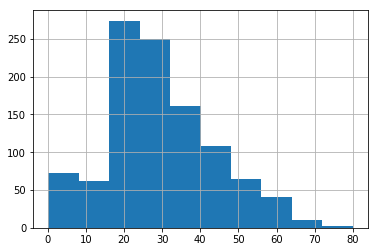

In [5]:
titanic.age.hist()

### Bivariate scatter plot using the <code>.plot</code> attribute

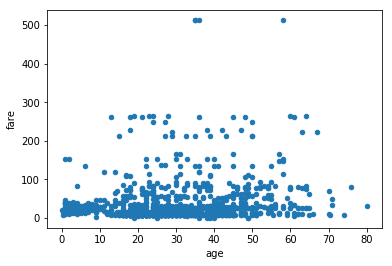

In [6]:
titanic.plot.scatter( 'age', 'fare' )

## Missing data in PANDAS

* Represented as <code>np.nan</code>, which stands for "Not A Number"
* NaN has type <code>float</code>
* No missing data representation for an integer!
    * Either convert all to floats to use NaN (recommended!), or
    * Convert values into strings and store empties as "" (less recommended)
    * Establish a "flag" value, e.g., -999 and filter out those before using (not recommended!)

In [10]:
import numpy as np

In [11]:
np.nan

nan

In [12]:
type( np.nan )

float

## Column data types
* A single column of data within a PANDAS <code>DataFrame</code> is called a <code>Series</code>.
* All values within a <code>Series</code> must be of the same type.
* Use the <code>.dtypes</code> attribute to check data types for each column

In [14]:
titanic.head(3)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [17]:
titanic.count()

pclass       1309
survived     1309
name         1309
sex          1309
age          1046
sibsp        1309
parch        1309
ticket       1309
fare         1308
cabin         295
embarked     1307
boat          486
body          121
home.dest     745
dtype: int64

In [13]:
titanic.dtypes

pclass         int64
survived       int64
name          object
sex           object
age          float64
sibsp          int64
parch          int64
ticket        object
fare         float64
cabin         object
embarked      object
boat          object
body         float64
home.dest     object
dtype: object

## Column data types may hint at missing values

When using <code>pd.read_csv()</code> and <code>pd.read_excel()</code> to load a file form disk, PANDAS will try to pick a data type for a column that makes sense.

* If a <code>float64</code> (just a fancy float), then missing values in the form of NaN are possible
    * Use <code>.count()</code> to count non-empty (non-NaN) values
* If an <code>int64</code> (just a fancy int), then probably no missing values in that column
* If an <code>object</code>, this almost always means it's a string in there
    * Can represent missing values as <code>""</code>, but <code>.count()</code> only works for <code>float</code> data types!

In [20]:
some_emptys = pd.Series( ["","asdf","","","","27",""] )
print( some_emptys.dtype )
some_emptys.count()

object


7

### Coerce to numeric values using <code>pd.to_numeric()</code>

In [22]:
some_emptys = pd.to_numeric( some_emptys, errors='coerce')

In [23]:
some_emptys

0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
5    27.0
6     NaN
dtype: float64

In [24]:
print( some_emptys.dtype )
some_emptys.count()

float64


1

## Statistics on a DataFrame ignore NaNs (as one might expect)

* In other words, doesn't count missing values as 0

In [25]:
titanic.count()

pclass       1309
survived     1309
name         1309
sex          1309
age          1046
sibsp        1309
parch        1309
ticket       1309
fare         1308
cabin         295
embarked     1307
boat          486
body          121
home.dest     745
dtype: int64

In [26]:
titanic.age.describe()

count    1046.000000
mean       29.881135
std        14.413500
min         0.166700
25%        21.000000
50%        28.000000
75%        39.000000
max        80.000000
Name: age, dtype: float64

## Using the Seaborn Package for visualization

* Browse [this page](https://seaborn.pydata.org/examples/index.html) to see all the types of nice figures you can make

In [27]:
import seaborn as sns

In [28]:
import matplotlib.pyplot as plt

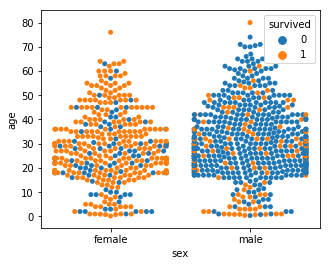

In [30]:
fig, ax = plt.subplots( figsize=(5,4) )

sns.swarmplot( x='sex', y='age', hue='survived',
              data=titanic, ax=ax )
#fig.savefig( 'testytest.pdf')

In [31]:
type( fig )

matplotlib.figure.Figure

In [32]:
type( ax)

matplotlib.axes._subplots.AxesSubplot

In [ ]:
ax.

In [ ]:
sns.swarmplot?

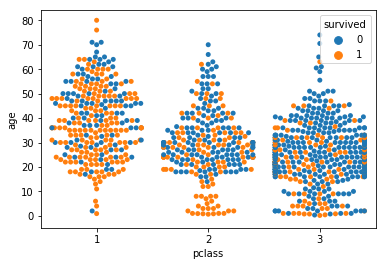

In [33]:
sns.swarmplot( x='pclass', y='age', hue='survived',
              data=titanic )

## Subselecting based on one of the variables

In [34]:
titanic.shape

(1309, 14)

In [35]:
titanic.sex.value_counts()

male      843
female    466
Name: sex, dtype: int64

In [36]:
titanic.sex.head()

0    female
1      male
2    female
3      male
4    female
Name: sex, dtype: object

In [ ]:
titanic.sex == 'male'

In [41]:
bool_array = titanic.sex == 'male'

In [42]:
len(bool_array)

1309

In [38]:
(titanic.sex == 'male').head()

0    False
1     True
2    False
3     True
4    False
Name: sex, dtype: bool

In [39]:
male = titanic[ titanic.sex == 'male' ]

In [43]:
bool_array = [True]*1000

In [46]:
#titanic[ bool_array ]

In [47]:
male.shape

(843, 14)

In [48]:
gender_tf = titanic.sex == 'male'

In [49]:
gender_tf.shape

(1309,)

In [50]:
male.shape

(843, 14)

In [51]:
female = titanic[ titanic.sex == 'female']

In [52]:
female.shape

(466, 14)

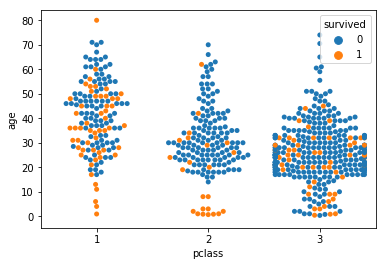

In [53]:
sns.swarmplot( x='pclass', y='age', hue='survived', 
              data=male)

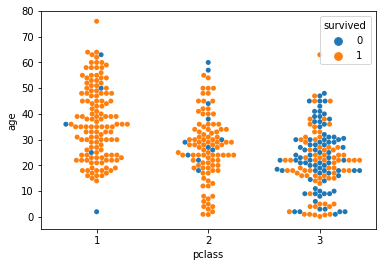

In [54]:
sns.swarmplot( x='pclass', y='age', hue='survived',
              data=female )

## Slicing by rows and columns using <code>.loc[]</code>

In [55]:
subset = titanic[ titanic.age < 25 ]

In [56]:
subset.shape

(409, 14)

In [57]:
subset = titanic.loc[ titanic.age < 25 ]

In [58]:
subset.shape

(409, 14)

# Complex sort

In [59]:
age_bool = titanic.age < 10

In [61]:
age_bool.value_counts()

False    1227
True       82
Name: age, dtype: int64

In [60]:
class_bool = titanic.pclass == 1

In [62]:
class_bool.value_counts()

False    986
True     323
Name: pclass, dtype: int64

In [63]:
age_class_bool = age_bool & class_bool

In [64]:
age_class_bool.value_counts()

False    1305
True        4
dtype: int64

In [65]:
titanic.loc[ age_class_bool, 'age' ]

1      0.9167
2      2.0000
94     4.0000
273    6.0000
Name: age, dtype: float64

In [ ]:
len(subset)

## Using <code>.sort_values()</code> for simple or complex sorting

In [ ]:
titanic.sort_values?

In [67]:
titanic.shape

(1309, 14)

In [ ]:
titanic.sort_values( by=['pclass','age'])

In [ ]:
titanic.sort_values( by=['pclass','age'],
                   ascending=False)

In [ ]:
titanic['home.dest']